## Classification Example

* Ejemplo tomado de kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud



In [9]:
#Importing librairies
import pandas as pd
import numpy as np

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
df = pd.read_csv('creditcard.csv', sep=",", encoding="ISO-8859-1", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


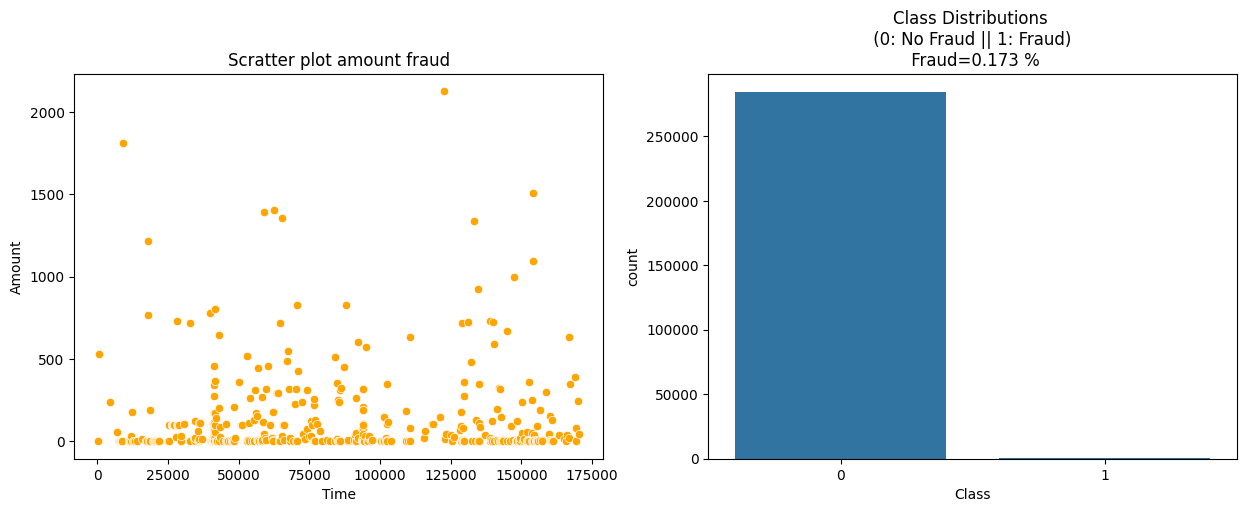

In [54]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

#plt.figure(figsize=(8,5))
sns.scatterplot(x=df.query("Class==1")['Time'], y=df.query("Class==1")['Amount'],color='orange',ax=ax[0])
ax[0].set_title('Scratter plot amount fraud')
#plt.xlabel('Time')
#plt.ylabel('Amount')

sns.countplot(x='Class', data=df,ax=ax[1])
p_fraud = round(100*(df.query("Class==1").shape[0]/df.shape[0]),3)
ax[1].set_title(f'Class Distributions \n (0: No Fraud || 1: Fraud) \n Fraud={p_fraud} %', fontsize=12)
plt.show()

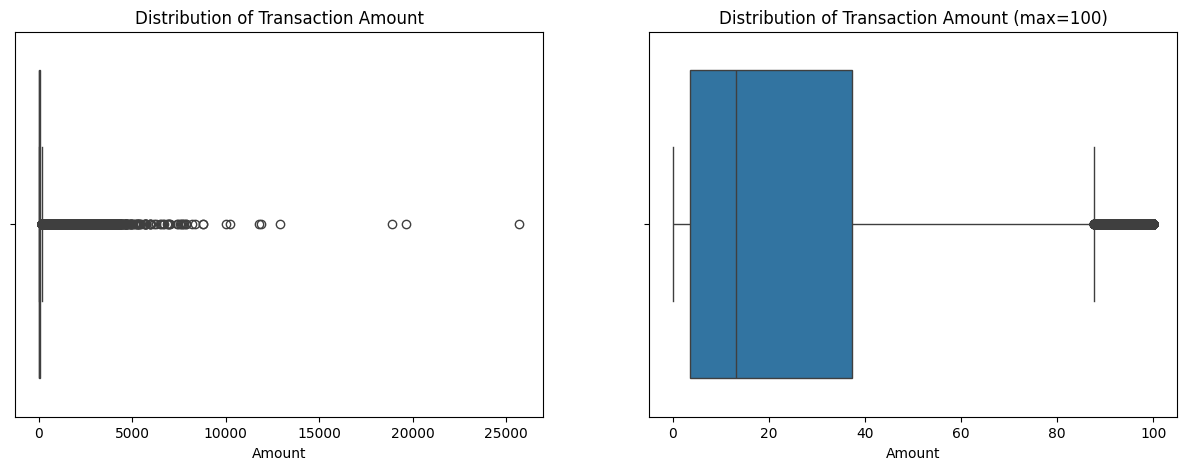

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(x=df.Amount,ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount', fontsize=12)
sns.boxplot(x=df.query("Amount <= 100").Amount,ax=ax[1])
ax[1].set_title('Distribution of Transaction Amount (max=100)', fontsize=12)
plt.show()

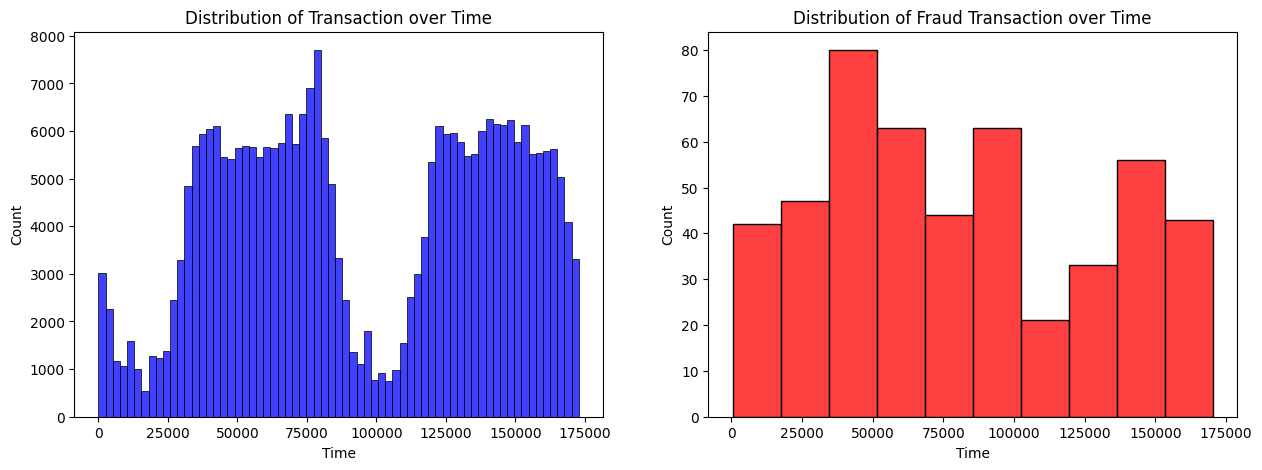

In [56]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(x=df.Time, color='b',ax=ax[0])
ax[0].set_title('Distribution of Transaction over Time', fontsize=12)

sns.histplot(x=df.query("Class==1").Time, color='r',ax=ax[1])
ax[1].set_title('Distribution of Fraud Transaction over Time', fontsize=12)

plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul

In [24]:
df['Class'] = df['Class'].astype('str').values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul

In [26]:
from sklearn.model_selection import train_test_split

y = df['Class'].values
x = df.drop(['Class','Amount','Time'], axis = 1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
y_train

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_metrics(y_test,y_pred):
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1score = f1_score(y_test,y_pred)
  c_matrix = pd.crosstab(y_test, y_pred, rownames=["Real"], colnames=["Predicho"])

  return {'accuracy':accuracy,'precision':precision,'recall':recall,'f1score':f1score}, c_matrix

In [44]:
models_metrics = {}
models_cm = {}

In [48]:
%%time
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=4
)

tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
models_metrics['DecisionTree'], models_cm['DecisionTree'] = get_metrics(y_test, y_pred)

CPU times: user 7.06 s, sys: 9.64 ms, total: 7.07 s
Wall time: 7.09 s


In [49]:
%%time
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=4
)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
models_metrics['RandomForest'], models_cm['RandomForest'] = get_metrics(y_test, y_pred)

CPU times: user 49 s, sys: 80.3 ms, total: 49.1 s
Wall time: 59.2 s


In [59]:
%%time
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(
    n_estimators=50
)
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)
models_metrics['AdaBoostClassifier'], models_cm['AdaBoostClassifier'] = get_metrics(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CPU times: user 1min 23s, sys: 83.1 ms, total: 1min 23s
Wall time: 1min 27s


In [39]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier(
    n_estimators=50,
    min_samples_split=4,
    max_depth=4
)
gradientboost.fit(x_train, y_train)
y_pred = gradientboost.predict(x_test)
y_pred

CPU times: user 4min 53s, sys: 240 ms, total: 4min 53s
Wall time: 4min 54s


array([0, 0, 0, ..., 0, 0, 0])

In [33]:
!pip install xgboost

In [51]:
%%time
from xgboost import XGBClassifier #XGBRegressor

df['Class'] = df['Class'].astype('int').values
from sklearn.model_selection import train_test_split

y = df['Class'].values
x = df.drop(['Class','Amount','Time'], axis = 1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
#y_train


modelxgb = XGBClassifier() ## modelo por default
modelxgb.fit(x_train, y_train)
y_pred = modelxgb.predict(x_test)
models_metrics['XGBoost'], models_cm['XGBoost'] = get_metrics(y_test, y_pred)

CPU times: user 6.65 s, sys: 31.6 ms, total: 6.68 s
Wall time: 3.59 s


In [61]:
df_metrics = pd.DataFrame.from_dict(models_metrics)
df_metrics

,DecisionTree,RandomForest,AdaBoostClassifier,XGBoost
accuracy,0.999403,0.999473,0.999216,0.999602
precision,0.869565,0.950495,0.834951,0.972222
recall,0.735294,0.705882,0.632353,0.772059
f1score,0.796813,0.810127,0.719665,0.860656


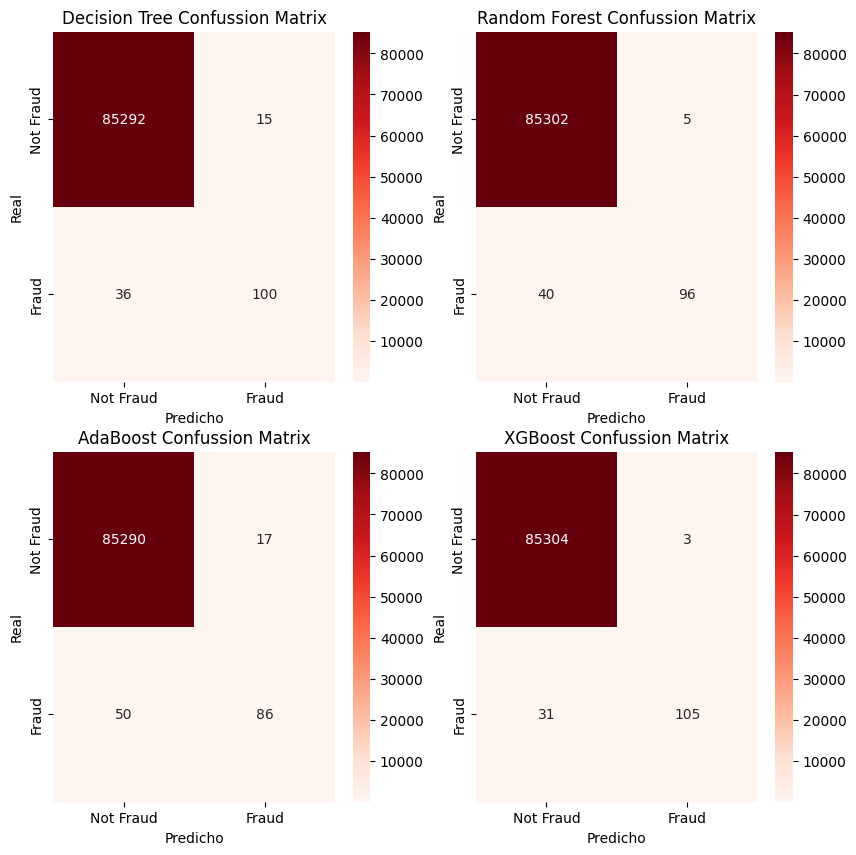

CPU times: user 1.09 s, sys: 113 ms, total: 1.21 s
Wall time: 1.11 s


In [62]:
%%time
fig, ax = plt.subplots(2,2,figsize=(10,10))


c_matrix = models_cm['DecisionTree']
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Reds" ,fmt='g',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud']
           ,ax=ax[0,0])
ax[0,0].set_title('Decision Tree Confussion Matrix', fontsize=12)


c_matrix = models_cm['RandomForest']
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Reds" ,fmt='g',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud']
           ,ax=ax[0,1])
ax[0,1].set_title('Random Forest Confussion Matrix', fontsize=12)


c_matrix = models_cm['AdaBoostClassifier']
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Reds" ,fmt='g',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud']
           ,ax=ax[1,0])
ax[1,0].set_title('AdaBoost Confussion Matrix', fontsize=12)

c_matrix = models_cm['XGBoost']
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Reds" ,fmt='g',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud']
           ,ax=ax[1,1])
ax[1,1].set_title('XGBoost Confussion Matrix', fontsize=12)



plt.show()

CPU times: user 3.64 s, sys: 9.64 ms, total: 3.65 s
Wall time: 4.48 s


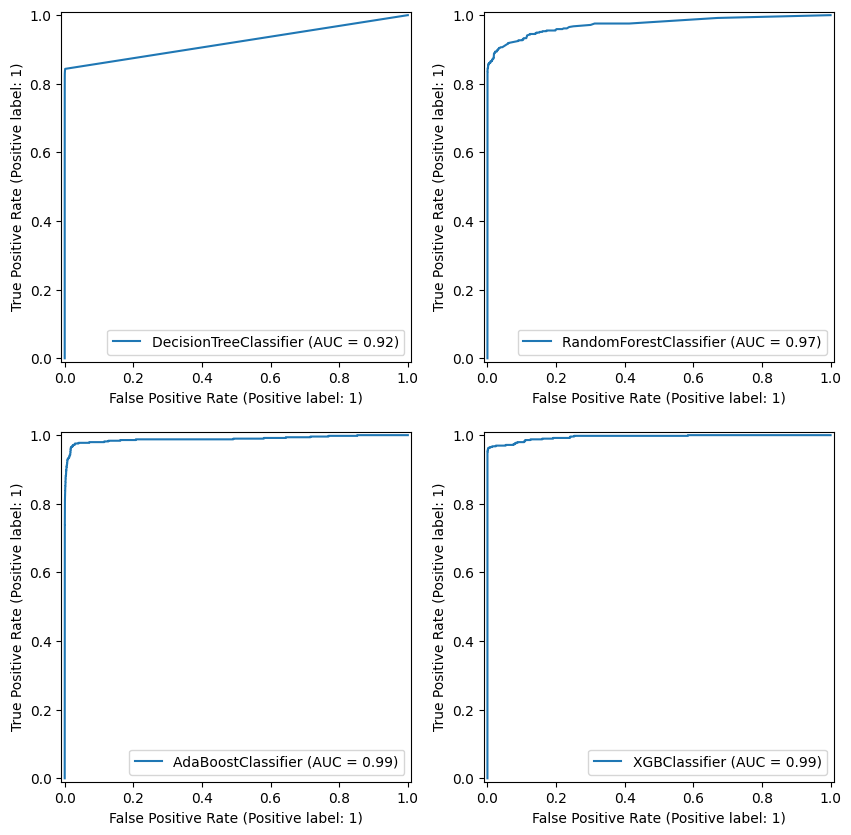

In [60]:
%%time
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(2,2,figsize=(10,10))

RocCurveDisplay.from_estimator(tree,x, y,ax=ax[0,0])
RocCurveDisplay.from_estimator(random_forest,x, y,ax=ax[0,1])
RocCurveDisplay.from_estimator(adaboost,x, y,ax=ax[1,0])
RocCurveDisplay.from_estimator(modelxgb,x, y,ax=ax[1,1])

In [66]:
%%time
## https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
## https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy=0.4)

x_smote, y_smote = smote.fit_resample(x_train,y_train)

CPU times: user 92.8 ms, sys: 27.1 ms, total: 120 ms
Wall time: 127 ms


In [67]:
Counter(y_train)

Counter({0: 199008, 1: 356})

In [68]:
Counter(y_smote)

Counter({0: 199008, 1: 79603})

In [70]:
79603/(199008)

0.39999899501527575

In [71]:
%%time

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
      estimator=RandomForestClassifier(),
      param_grid = {'n_estimators':[10,20], 'max_depth':[1,5]},
      cv=3,
      scoring='recall',
      verbose=2)

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .......................max_depth=1, n_estimators=10; total time=   1.8s
[CV] END .......................max_depth=1, n_estimators=10; total time=   3.2s
[CV] END .......................max_depth=1, n_estimators=10; total time=   2.0s
[CV] END .......................max_depth=1, n_estimators=20; total time=   2.4s
[CV] END .......................max_depth=1, n_estimators=20; total time=   2.4s
[CV] END .......................max_depth=1, n_estimators=20; total time=   2.3s
[CV] END .......................max_depth=5, n_estimators=10; total time=   7.9s
[CV] END .......................max_depth=5, n_estimators=10; total time=   7.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   5.3s
[CV] END .......................max_depth=5, n_estimators=20; total time=  11.6s
[CV] END .......................max_depth=5, n_estimators=20; total time=  14.2s
[CV] END .......................max_depth=5, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5], 'n_estimators': [10, 20]},
             scoring='recall', verbose=2)

In [72]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [73]:
grid_search.best_score_

0.7331339315387172

In [75]:
%%time

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
      estimator=RandomForestClassifier(),
      n_iter = 4,
      param_distributions = {'n_estimators':[10,20], 'max_depth':[1,5]},
      cv=3,
      scoring='recall',
      verbose=2)

random_search.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .......................max_depth=1, n_estimators=10; total time=   1.9s
[CV] END .......................max_depth=1, n_estimators=10; total time=   5.3s
[CV] END .......................max_depth=1, n_estimators=10; total time=   2.3s
[CV] END .......................max_depth=1, n_estimators=20; total time=   3.7s
[CV] END .......................max_depth=1, n_estimators=20; total time=   2.4s
[CV] END .......................max_depth=1, n_estimators=20; total time=   2.8s
[CV] END .......................max_depth=5, n_estimators=10; total time=   8.7s
[CV] END .......................max_depth=5, n_estimators=10; total time=   5.5s
[CV] END .......................max_depth=5, n_estimators=10; total time=   7.5s
[CV] END .......................max_depth=5, n_estimators=20; total time=  13.1s
[CV] END .......................max_depth=5, n_estimators=20; total time=  11.5s
[CV] END .......................max_depth=5, n_es

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=4,
                   param_distributions={'max_depth': [1, 5],
                                        'n_estimators': [10, 20]},
                   scoring='recall', verbose=2)

In [76]:
random_search.best_params_

{'n_estimators': 10, 'max_depth': 5}

In [77]:
random_search.best_score_

0.7162797322318758

# Tarea

Desarrolle un modelo utilizando los datos con SMOTE Oversampling.
* Utilizar de entrenamiento variables **x_smote, y_smote**
* Escoja el modelo que mejor se ajustó a sus datos sin oversampling.
* Realice una comparación de los resultados entre el modelo **con oversampling** y el mejor modelo obtenido con los datos **sin oversampling**. Interprete los resultados.
* Para el objetivo específico que queremos solucionar (identificar transacciones fraudulentas dado el perjuicio que puede representar esto para los clientes), ¿cuál modelo entrega una mejor solución? ¿por qué ese modelo es mejor?.

Utilizando XGBoost:
* Realice una optimización de los hiperparámetros del modelo utilizando GridSearchCV o RandomSearchCV.
* ¿Cuáles son los valores de los hiperparámetros del mejor modelo obtenido?.
* Compare el modelo obtenido con la optimización de hiperparámetros vs el modelo por default (hiperparámetros por defecto incluidos en la librería), ¿qué mejoras logra observar basándose en las métricas?.